# Matching LST Data with a Sentinel-3 Cube

This notebook serves to demonstrate how data from the CCI LST ECV can matched against an Analysis-Ready Data Cube created from Sentinel-3 Data and provided by the Copernicus Data Space Ecosystem (CDSE). For this, we open the data sets separately and apply operations, some of whom provided by the ESA CCI Toolbox, to bring the data together.

This notebook runs in any Python environment which has the following packages installed:
- esa-climate-toolbox
- xcube-stac
- jupyterlab
- libgdal-netcdf

For convenience, there is an environment.yml in the folder next to this notebook you can use to create such an environment.

We start with necessary imports beforehand.

In [1]:
import matplotlib.pyplot as plt

from xcube.core.store import new_data_store

from esa_climate_toolbox.core import get_op
from esa_climate_toolbox.core import list_ecv_datasets
from esa_climate_toolbox.core import open_data

In [2]:
%matplotlib inline

As for the notebook focussed on finding matches with single observations, we are looking for data from the CDSE that is based on Sentinel missions. Using 'list_ecv_datasets', we may search for datasets for any ECV. We particularly want to look for LST data derived from Sentinel data. We may look for such datasets like this:

In [3]:
datasets = [(dataset, store) for dataset, store in list_ecv_datasets("LST") if "Sentinel" in dataset]
datasets

[('esacci.LST.day.L3C.LST.SLSTR.Sentinel-3A.SLSTRA.3-00.DAY', 'esa-cci'),
 ('esacci.LST.day.L3C.LST.SLSTR.Sentinel-3A.SLSTRA.3-00.NIGHT', 'esa-cci'),
 ('esacci.LST.day.L3C.LST.SLSTR.Sentinel-3B.SLSTRB.3-00.DAY', 'esa-cci'),
 ('esacci.LST.day.L3C.LST.SLSTR.Sentinel-3B.SLSTRB.3-00.NIGHT', 'esa-cci'),
 ('esacci.LST.mon.L3C.LST.SLSTR.Sentinel-3A.SLSTRA.3-00.DAY', 'esa-cci'),
 ('esacci.LST.mon.L3C.LST.SLSTR.Sentinel-3A.SLSTRA.3-00.NIGHT', 'esa-cci'),
 ('esacci.LST.mon.L3C.LST.SLSTR.Sentinel-3B.SLSTRB.3-00.DAY', 'esa-cci'),
 ('esacci.LST.mon.L3C.LST.SLSTR.Sentinel-3B.SLSTRB.3-00.NIGHT', 'esa-cci')]

As the Data cubes on the CDSE are provided in a daily resolution, we will pick one such dataset and open it. In particular, we want to examine extreme temperatures occurring in December 2019 in Southern Australia, so we set the region and time range accordingly when opening the dataset.

In [4]:
southern_australia_event_region=[131.5, -32.5, 133.5, -30.5]
southern_australia_event_time_range=["2019-12-15", "2019-12-20"]

In [5]:
lst_ds, ds_name = open_data(
    "esacci.LST.day.L3C.LST.SLSTR.Sentinel-3A.SLSTRA.3-00.DAY",
    region=southern_australia_event_region,
    time_range=southern_australia_event_time_range,
    var_names="lst"
)
lst_ds

<xarray.Dataset> Size: 2MB
Dimensions:    (time: 6, lat: 200, lon: 200, channel: 2, bnds: 2)
Coordinates:
  * channel    (channel) float64 16B 11.0 12.0
  * lat        (lat) float32 800B -32.49 -32.49 -32.47 ... -30.53 -30.52 -30.51
  * lon        (lon) float32 800B 131.5 131.5 131.5 131.5 ... 133.5 133.5 133.5
  * time       (time) datetime64[ns] 48B 2019-12-15T12:00:00 ... 2019-12-20T1...
    time_bnds  (time, bnds) datetime64[ns] 96B dask.array<chunksize=(6, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    lst        (time, lat, lon) float64 2MB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.LST.day.L3C.LST.SLSTR.Sentinel-3A.SLSTRA....
    date_created:            2025-09-29T15:49:38.436800
    processing_level:        L3C
    time_coverage_start:     2019-12-15T00:00:00
    time_coverage_end:       2019-12-21T00:00:00
    time_coverage_duration:  P6DT0H0M0S
    history:                 [{'program': 'xcube_cci.chunkstore.CciChunkStore...

We continue with visualising all images at the same time.

In [6]:
def plot_six_images(ds, var_name):
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 6), sharex=True)
    ax = ax.ravel()
    for i in range(len(ds.time)):
        ds[var_name].isel(time=i).plot(ax=ax[i])

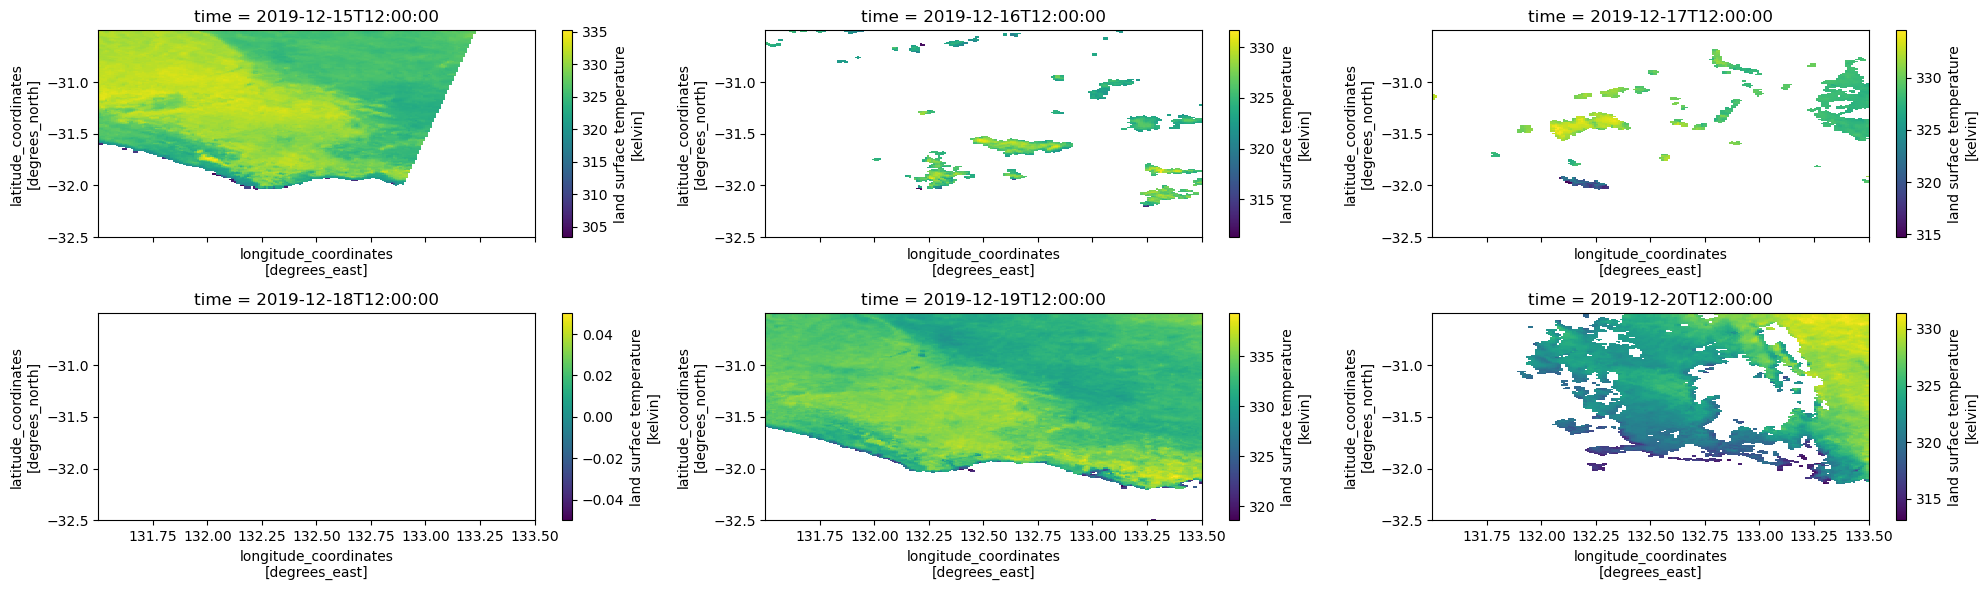

In [7]:
plot_six_images(lst_ds, "lst")

We have measurements for six conesecutive days, which is good. For purposes of conveying information, we transfer the data from Kelvin to Celsius using the 'arithmetics' operation.

In [8]:
arithmetics = get_op("arithmetics")

In [9]:
converted_lst_ds = arithmetics(lst_ds, "-272.15")
converted_lst_ds

<xarray.Dataset> Size: 2MB
Dimensions:    (channel: 2, lat: 200, lon: 200, time: 6, bnds: 2)
Coordinates:
  * channel    (channel) float64 16B 11.0 12.0
  * lat        (lat) float32 800B -32.49 -32.49 -32.47 ... -30.53 -30.52 -30.51
  * lon        (lon) float32 800B 131.5 131.5 131.5 131.5 ... 133.5 133.5 133.5
  * time       (time) datetime64[ns] 48B 2019-12-15T12:00:00 ... 2019-12-20T1...
    time_bnds  (time, bnds) datetime64[ns] 96B dask.array<chunksize=(6, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    lst        (time, lat, lon) float64 2MB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.LST.day.L3C.LST.SLSTR.Sentinel-3A.SLSTRA....
    date_created:            2025-09-29T15:49:38.436800
    processing_level:        L3C
    time_coverage_start:     2019-12-15T00:00:00
    time_coverage_end:       2019-12-21T00:00:00
    time_coverage_duration:  P6DT0H0M0S
    history:                 [{'program': 'xcube_cci.chunkstore.CciChunkStore...

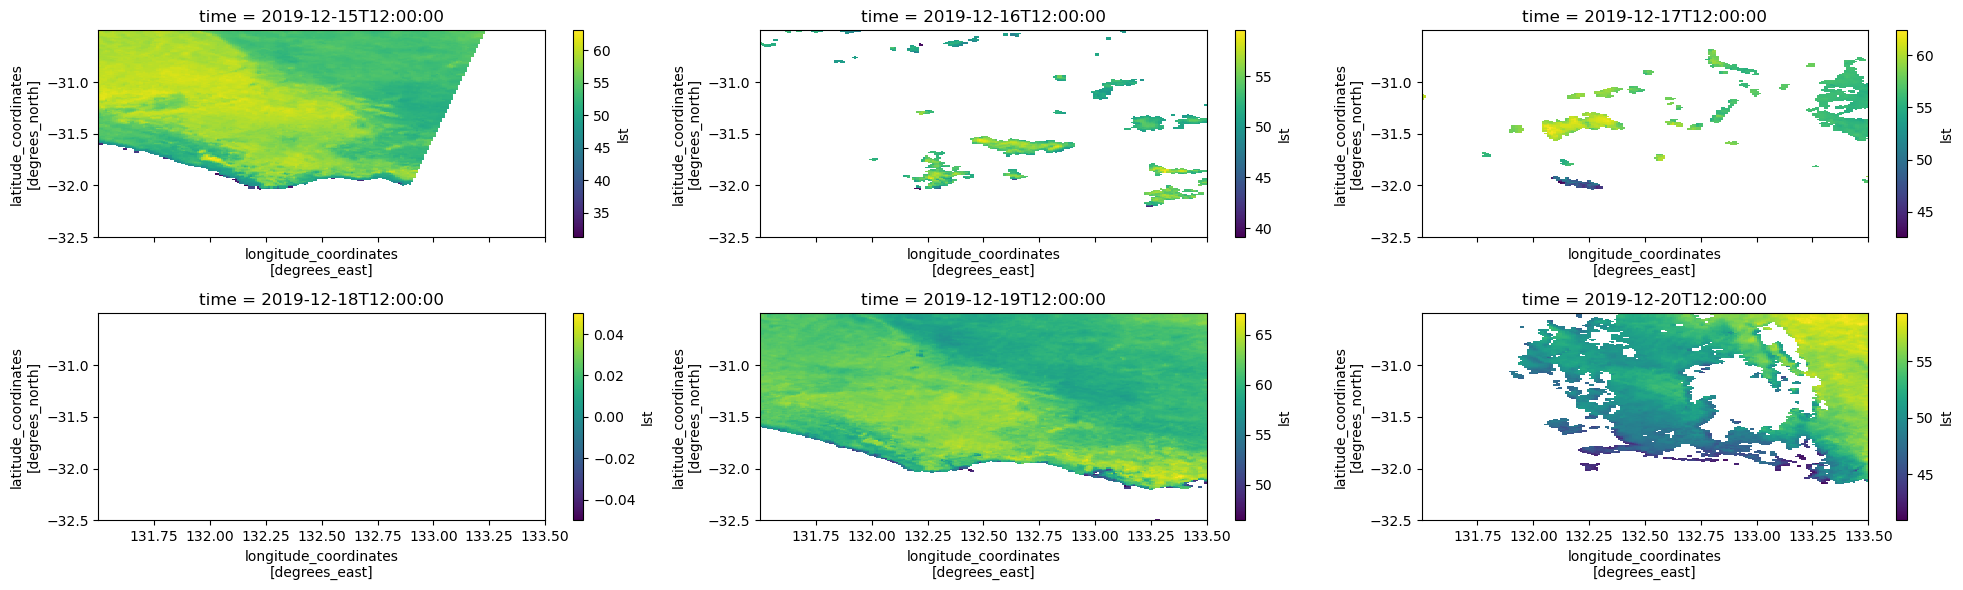

In [10]:
plot_six_images(converted_lst_ds, "lst")

the conversion was successful and we now see the land surface temperature in Celsius, reaching dramatic values. We are set now to request a data cube from the CDSE with Sentinel-3 Data for the same region in time and space.

We once more use the stac-cdse store and set its credentials (consider the readme for information on how to obtain them).

In [11]:
cdse_credentials = dict(
    key=<your_key>,
    secret=<your_secret>
)

This time, we use the store with the identifier "stac-cdse-ardc" to ask for analysis-ready data cubes.

In [12]:
stac_cdse_ardc_store = new_data_store("stac-cdse-ardc", **cdse_credentials)

Now that we have the store, we see what data it provides.

In [13]:
stac_cdse_ardc_store.list_data_ids()

['sentinel-2-l2a', 'sentinel-2-l1c', 'sentinel-3-syn-2-syn-ntc']

As it has Sentinel-3 Synergy Data. In addition to the region and the time range, we also specify which bands we want to open (given by asset_names), the coordinate reference system and the spatial resolution (both the same as the LST dataset). To get a fit with the LST data, we ask for the exact minimum and maximum spatial values. As assets, we ask for reflectance bands originating from the SLSTR instrument. 

In [14]:
min_lon = min(converted_lst_ds.lon.values)
min_lat = min(converted_lst_ds.lat.values)
max_lon = max(converted_lst_ds.lon.values)
max_lat = max(converted_lst_ds.lat.values)

In [15]:
syn_ds = stac_cdse_ardc_store.open_data(
    data_id="sentinel-3-syn-2-syn-ntc",
    bbox=[min_lon, min_lat, max_lon, max_lat],
    time_range=southern_australia_event_time_range,
    spatial_res=0.01,
    crs="EPSG:4326",
    asset_names=["syn_S1N_reflectance", "syn_S2N_reflectance"],
)
syn_ds

<xarray.Dataset> Size: 4MB
Dimensions:      (time: 6, lat: 200, lon: 200, bnds: 2)
Coordinates:
  * lat          (lat) float64 2kB -30.5 -30.52 -30.52 ... -32.47 -32.48 -32.49
  * lon          (lon) float64 2kB 131.5 131.5 131.5 131.5 ... 133.5 133.5 133.5
    lon_bnds     (lon, bnds) float64 3kB 131.5 131.5 131.5 ... 133.5 133.5 133.5
    lat_bnds     (lat, bnds) float64 3kB -30.5 -30.51 -30.51 ... -32.49 -32.5
  * time         (time) datetime64[ns] 48B 2019-12-15T01:05:27.537226 ... 201...
Dimensions without coordinates: bnds
Data variables:
    SDR_S1N      (time, lat, lon) float32 960kB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    SDR_S1N_err  (time, lat, lon) float32 960kB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    SDR_S2N      (time, lat, lon) float32 960kB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    SDR_S2N_err  (time, lat, lon) float32 960kB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
Attributes:
    stac_item_ids:       {'2019-12-15T01:05:27.537000': ['S3A_SY_2_SYN____201...
    stac_catalog_url:    https://stac.dataspace.copernicus.eu/v1
    xcube_stac_version:  1.1.0

When the product is ready, we may continue with deriving an index from the reflectance bands.

In [16]:
da = (syn_ds.SDR_S1N - syn_ds.SDR_S2N) / (syn_ds.SDR_S1N + syn_ds.SDR_S2N)
syn_ds = syn_ds.assign(vi=da)
syn_ds

<xarray.Dataset> Size: 5MB
Dimensions:      (time: 6, lat: 200, lon: 200, bnds: 2)
Coordinates:
  * lat          (lat) float64 2kB -30.5 -30.52 -30.52 ... -32.47 -32.48 -32.49
  * lon          (lon) float64 2kB 131.5 131.5 131.5 131.5 ... 133.5 133.5 133.5
    lon_bnds     (lon, bnds) float64 3kB 131.5 131.5 131.5 ... 133.5 133.5 133.5
    lat_bnds     (lat, bnds) float64 3kB -30.5 -30.51 -30.51 ... -32.49 -32.5
  * time         (time) datetime64[ns] 48B 2019-12-15T01:05:27.537226 ... 201...
Dimensions without coordinates: bnds
Data variables:
    SDR_S1N      (time, lat, lon) float32 960kB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    SDR_S1N_err  (time, lat, lon) float32 960kB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    SDR_S2N      (time, lat, lon) float32 960kB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    SDR_S2N_err  (time, lat, lon) float32 960kB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    vi           (time, lat, lon) float32 960kB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
Attributes:
    stac_item_ids:       {'2019-12-15T01:05:27.537000': ['S3A_SY_2_SYN____201...
    stac_catalog_url:    https://stac.dataspace.copernicus.eu/v1
    xcube_stac_version:  1.1.0

Ultimately, we can plot the data the same way we plotted the LST data.

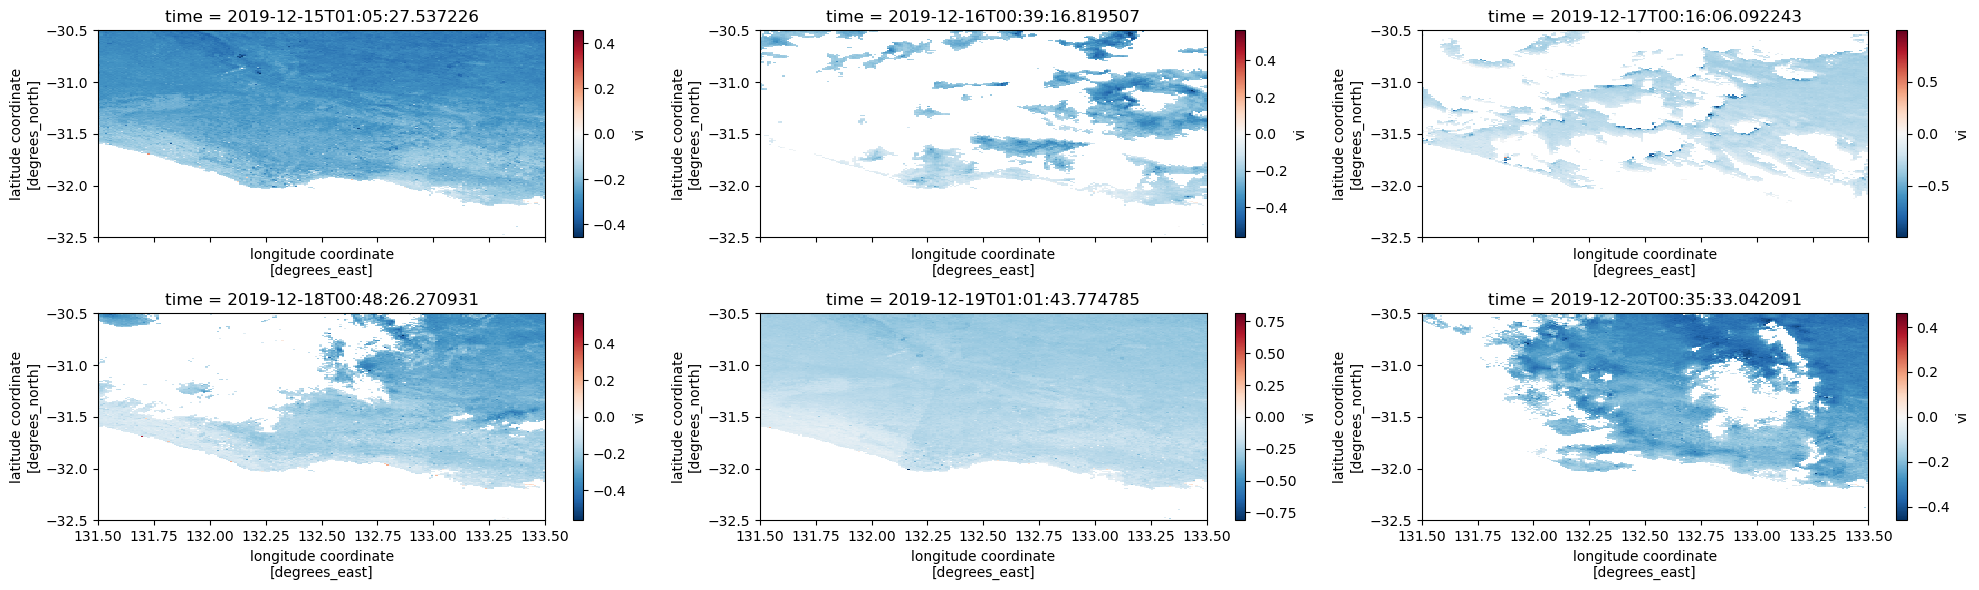

In [17]:
plot_six_images(syn_ds, "vi")